In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
#import geopandas as gpd
import matplotlib.pyplot as plt
#note, geopandas and pyspark now installed

In [34]:
df= pd.read_csv('immo_data.csv.zip')
#https://www.kaggle.com/datasets/corrieaar/apartment-rental-offers-in-germany?resource=download

An overview of missing values

<AxesSubplot:>

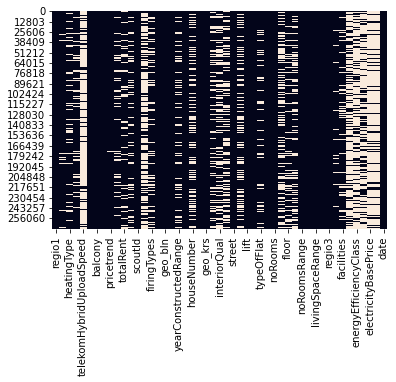

In [57]:
sns.heatmap(df.isnull(), cbar=False)

### At first glance...

There is LOTS of missing data (likely not due to the collectors, rather that there are fields which are not required on the site...since I applied personally to live in over 200 flats in germany and probably read at least 1000 postings by now, some I will fill with values based on what seems likely to me, and others I will make into subsets since I want to do analyses with most of the features in this dataset)

the descriptions and facilities are in german (which is fine, since I understand)- could be helpful to get a listing fo the most common or important /  appealing facilities (Badewanne, Fahrstuhl, keller, Parkett/ Diele, neu saniert) to compare with the price point and region.. also interesting with fresher (more recent) data to look at gas heating and see if properties not cheaper- going to fully dissect and clean that part up later

also geo features = map visualisations? :~)

In [76]:
df.columns 
#telekom tv offer: price for cable TV

#regio3 = town
#geo_krs = geo _kreis = municipality = regio2?? (smaller municipality, COULD differ )
#geo_bln = geo_bundesland = state = regio1 (make a col for each and then see if all vals same..?) 

#unsure what range features are..info on repo?

#df['']
#df[''].unique()

Index(['regio1', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'telekomHybridUploadSpeed', 'newlyConst', 'balcony', 'picturecount',
       'pricetrend', 'telekomUploadSpeed', 'totalRent', 'yearConstructed',
       'scoutId', 'noParkSpaces', 'firingTypes', 'hasKitchen', 'geo_bln',
       'cellar', 'yearConstructedRange', 'baseRent', 'houseNumber',
       'livingSpace', 'geo_krs', 'condition', 'interiorQual', 'petsAllowed',
       'street', 'streetPlain', 'lift', 'baseRentRange', 'typeOfFlat',
       'geo_plz', 'noRooms', 'thermalChar', 'floor', 'numberOfFloors',
       'noRoomsRange', 'garden', 'livingSpaceRange', 'regio2', 'regio3',
       'description', 'facilities', 'heatingCosts', 'energyEfficiencyClass',
       'lastRefurbish', 'electricityBasePrice', 'electricityKwhPrice', 'date'],
      dtype='object')

## Wrangle

Rename cols according to guidelines, and make new df to export later (once clean) with relevant cols

In [78]:
df['heating_fuel'] = df['firingTypes']

In [79]:
df['heating_type']=df['heatingType']
df['cable_tv'] = df['telekomTvOffer']
df['net_speed'] = df['telekomUploadSpeed']
df['new'] = df['newlyConst']
df['warm_rent'] = df['totalRent']
df['construction_yr'] = df['yearConstructed']
df['cold_rent'] = df['baseRent']
df['ad_id'] = df['scoutId'] #rmv no Id? 
df['parkingspot_no'] = df['noParkSpaces'] #NaN to 0
df['heating_fuel'] = df['firingTypes']
df['kitchen'] = df['hasKitchen']
df['geo_state'] = df['geo_bln']
df['sq_m'] = df['livingSpace']
df['geo_municipality'] = df['geo_krs']
df['pets'] = df['petsAllowed']
df['street_name'] = df['streetPlain']#be careful not to confused with street (not cleaned)
df['geo_postcode'] = df['geo_plz']
df['rooms_no'] = df['noRooms']
df['level'] = df['floor'] 
df['buildings_floors'] = df['numberOfFloors']
df['suburb'] = df['regio3']
df['flat_type'] = df['typeOfFlat']
df['heating_cost'] = df['heatingCosts']
df['energy_efficiency'] = df['energyEfficiencyClass']
df['last_refurbish'] = df['lastRefurbish'] #datatype!! beware (float, but year actually)

#### New df: with changed feature names, and relevant features

In [82]:
rentals = df[[ 'date', 'ad_id','geo_state', 'geo_municipality', 'suburb', 'sq_m','condition','rooms_no', 'warm_rent','cold_rent', 'level', 'kitchen', 'construction_yr','heating_fuel','cellar', 'parkingspot_no','street_name', 'lift','flat_type', 'buildings_floors', 'garden','description','facilities','heating_cost',]]

<AxesSubplot:>

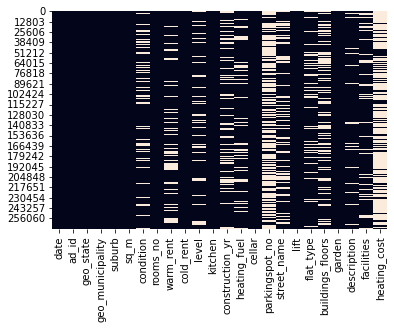

In [86]:
sns.heatmap(rentals.isnull(), cbar=False) #get rid of those without warm or cold rent? or advanced fill method? 

In [85]:
rentals.dtypes #look at dtypes to determine what needs to be changed

date                 object
ad_id                 int64
geo_state            object
geo_municipality     object
suburb               object
sq_m                float64
condition            object
rooms_no            float64
warm_rent           float64
cold_rent           float64
level               float64
kitchen                bool
construction_yr     float64
heating_fuel         object
cellar                 bool
parkingspot_no      float64
street_name          object
lift                   bool
flat_type            object
buildings_floors    float64
garden                 bool
description          object
facilities           object
heating_cost        float64
dtype: object

Fine as is: bools (kitchen, lift, garden and cellar), on ice (description and facilities), all floats not below, and int ad_id

Convert: to date / year formats (date, construction_yr), to int64 (rooms_no, level, parkingspot_no, buildings_floors), to string? df['column'] = df['column'].astype('str') OR df['column'] = df['column'].astype('|S') 

# EDA 

In [ ]:
#want to know what factors most predict price in different states 

In [ ]:
#want to know what factors most predict price in most expensive and least two expensive places.. 

In [ ]:
#want to know 